# Python Image Recognition

## Showing images with Python Imaging Library (PIL)

In [1]:
from PIL import Image

cat_image_pathname = r".\images\cat1.png"
cat_image = Image.open(cat_image_pathname)
cat_image.show()

## Loading CIFAR10 dataset

In [3]:
from keras.datasets import cifar10

labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Dataset will be downloaded if not detected.
(X_train, y_train), (X_test, y_test) = cifar10.load_data()  

# Plotting the images from the dataset

Enter index: 5


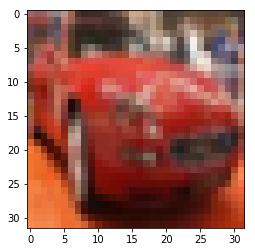

automobile


In [5]:
from matplotlib import pyplot as plt

index = int(input("Enter index: "))
display_image = X_train[index]
display_label = y_train[index][0]

# Using matplotlib
plt.imshow(display_image)
plt.show()

# Using Python Imaging Library (PIL)
# final_image = Image.fromarray(display_image)
# final_image.show()

print(labels[display_label])

# Building the model

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.constraints import maxnorm

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation="relu", padding="same", kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation="relu", kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=SGD(lr=0.01), metrics=["accuracy"])

# Training the model and saving it

In [7]:
import h5py
from keras.utils import np_utils

new_X_train = X_train.astype("float32")
new_X_test = X_test.astype("float32")
new_X_train /= 255
new_X_test /= 255
new_Y_train = np_utils.to_categorical(y_train)
new_Y_test = np_utils.to_categorical(y_test)

model.fit(new_X_train, new_Y_train, epochs=3, batch_size=32)
model.save("trained_model.h5")

Epoch 1/3
50000/50000 [==============================] - 107s 2ms/step - loss: 1.9291 - acc: 0.3071
Epoch 2/3
50000/50000 [==============================] - 105s 2ms/step - loss: 1.6605 - acc: 0.4118
Epoch 3/3
50000/50000 [==============================] - 100s 2ms/step - loss: 1.4961 - acc: 0.4667


# Testing the model

In [10]:
import numpy as np
from keras.models import load_model

model = load_model("trained_model.h5")

#input_path = input("Enter image file pathname: ")
input_path = r".\images\car1.png"
input_image = Image.open(input_path)
input_image = input_image.resize((32, 32), resample=Image.LANCZOS)
image_array = np.array(input_image)
image_array =image_array.astype("float32")
image_array /= 255.0
image_array = image_array.reshape(1, 32, 32, 3)

answer = model.predict(image_array)
input_image.show()
print(labels[np.argmax(answer)])

automobile
